In [87]:
import os
os.chdir('/Users/mac/Desktop/ds youtube')
import pandas as pd
video_data=pd.read_csv('youtube.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'youtube.csv'

In [69]:
video_data['Publish_date']=pd.to_datetime(video_data['Publish_date']).dt.date
video_data['Views']=pd.to_numeric(video_data['Views'])
video_data['Likes']=pd.to_numeric(video_data['Likes'])
video_data['Comments']=pd.to_numeric(video_data['Comments'])
print(video_data["Likes"].dtype)
print(video_data["Views"].dtype)

video_data['Title'] = video_data['Title'].str.replace('|', '_').str.replace('?', '').str.replace('$', '_')


print(video_data.head())


int64
int64
                                               Title Publish_date  \
0  “When you feel powerless, it's often actually ...   2025-04-25   
1  The AI Arsenal That Could Stop World War III _...   2025-04-25   
2   To talk climate, lead with fun. #TEDTalks #Vegan   2025-04-23   
3  Can Big Tech and Privacy Coexist _ Carole Cadw...   2025-04-23   
4  Your Inner Fire Is Your Greatest Strength _ Xi...   2025-04-22   

                                         Description  Duration  Views  Likes  \
0  "If you can't respect the basic fundamental un...    PT1M9S  12828    620   
1  AI in warfare is no longer hypothetical; it's ...  PT15M17S  52657   2428   
2  Food is culture, food is life — it’s part of w...   PT2M13S  33988    517   
3  "If you can't respect the basic fundamental un...  PT36M22S  21172    557   
4  Hope isn’t just a feeling, but a skill you can...  PT11M51S  30269    864   

   Comments  
0        21  
1       514  
2         8  
3        96  
4        60  


In [71]:
import re



def iso_to_seconds(duration):
    match = re.match(r'PT(?:(\d+)H)?(?:(\d+)M)?(?:(\d+)S)?', duration)
    if not match:
        return 0
    hours = int(match.group(1)) if match.group(1) else 0
    minutes = int(match.group(2)) if match.group(2) else 0
    seconds = int(match.group(3)) if match.group(3) else 0
    return hours * 3600 + minutes * 60 + seconds


def seconds_to_hms(seconds):
    h = seconds // 3600
    m = (seconds % 3600) // 60
    s = seconds % 60
    return f'{h:02d}:{m:02d}:{s:02d}'


video_data['Duration_seconds'] = video_data['Duration'].apply(iso_to_seconds)
video_data['Duration_hms'] = video_data['Duration_seconds'].apply(seconds_to_hms)
video_data.drop(columns=['Duration'])

print(video_data[['Duration_seconds', 'Duration_hms']].head())


   Duration_seconds Duration_hms
0                69     00:01:09
1               917     00:15:17
2               133     00:02:13
3              2182     00:36:22
4               711     00:11:51


In [73]:
video_data.to_csv('youtubemod.csv',index=False)
video_data_cleaned=pd.read_csv('youtubemod.csv')
video_data_cleaned.head()


,Title,Publish_date,Description,Duration,Views,Likes,Comments,Duration_seconds,Duration_hms
0,"“When you feel powerless, it's often actually ...",2025-04-25,"""If you can't respect the basic fundamental un...",PT1M9S,12828,620,21,69,00:01:09
1,The AI Arsenal That Could Stop World War III _...,2025-04-25,AI in warfare is no longer hypothetical; it's ...,PT15M17S,52657,2428,514,917,00:15:17
2,"To talk climate, lead with fun. #TEDTalks #Vegan",2025-04-23,"Food is culture, food is life — it’s part of w...",PT2M13S,33988,517,8,133,00:02:13
3,Can Big Tech and Privacy Coexist _ Carole Cadw...,2025-04-23,"""If you can't respect the basic fundamental un...",PT36M22S,21172,557,96,2182,00:36:22
4,Your Inner Fire Is Your Greatest Strength _ Xi...,2025-04-22,"Hope isn’t just a feeling, but a skill you can...",PT11M51S,30269,864,60,711,00:11:51


In [75]:
top10vids=video_data_cleaned.sort_values(by='Views',ascending=False).head(10).copy()
top10vids['Title'] = top10vids['Title']
top10vids



,Title,Publish_date,Description,Duration,Views,Likes,Comments,Duration_seconds,Duration_hms
2978,Inside the Mind of a Master Procrastinator _ T...,2016-04-06,Tim Urban knows that procrastination doesn't m...,PT14M4S,58868583,2007342,79094,844,00:14:04
3412,How to Speak So That People Want to Listen _ J...,2014-06-27,"Have you ever felt like you're talking, but no...",PT9M59S,44884439,982225,13380,599,00:09:59
3237,The next outbreak We’re not ready _ Bill Gates...,2015-04-03,"In 2014, the world avoided a horrific global o...",PT8M37S,38148641,743583,125579,517,00:08:37
3639,Tom Thum: The orchestra in my mouth _ TED,2013-07-19,"In a highly entertaining performance, beatboxe...",PT11M42S,36619518,812729,20489,702,00:11:42
3769,"Looks aren't everything. Believe me, I'm a mod...",2013-01-16,Visit http://TED.com to get our entire library...,PT9M38S,30479449,517747,25452,578,00:09:38
3610,The art of misdirection _ Apollo Robbins _ TED,2013-09-13,Visit http://TED.com to get our entire library...,PT8M48S,27817429,550961,12990,528,00:08:48
3028,Robert Waldinger: What makes a good life Lesso...,2016-01-25,What keeps us happy and healthy as we go throu...,PT12M47S,27322497,522749,11792,767,00:12:47
3839,Your Body Language May Shape Who You Are _ Amy...,2012-10-01,"Body language affects how others see us, but i...",PT21M3S,26829433,494852,10384,1263,00:21:03
2718,Elon Musk: The future we're building -- and bo...,2017-05-03,Elon Musk discusses his new project digging tu...,PT40M51S,26722427,396291,25432,2451,00:40:51
3868,Strange answers to the psychopath test _ Jon R...,2012-08-15,Visit http://TED.com to get our entire library...,PT18M2S,24713270,473954,23935,1082,00:18:02


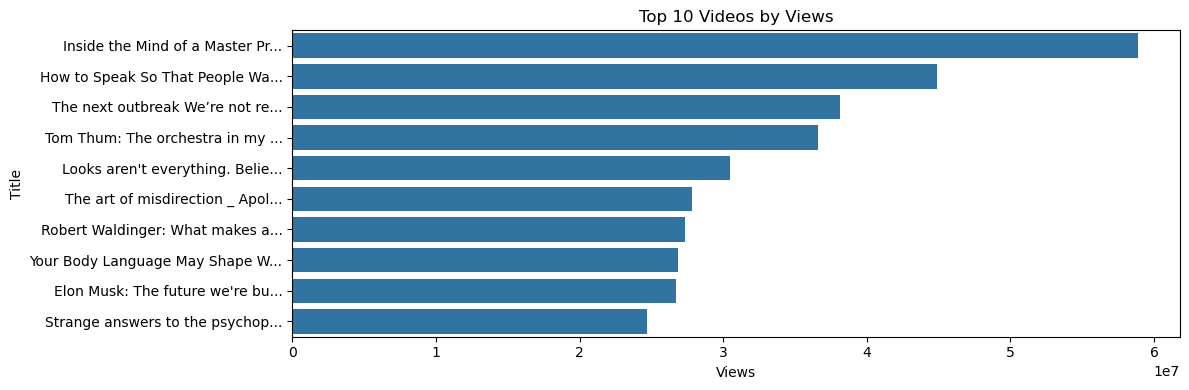

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
top10vids=video_data_cleaned.sort_values(by='Views',ascending=False).head(10).copy()
top10vids['Title'] = top10vids['Title'].apply(lambda x: x[:30] + '...' if len(x) > 30 else x)
plt.figure(figsize=(12, 4))
ax1 = sns.barplot(x='Views', y='Title', data=top10vids)
plt.title('Top 10 Videos by Views')
plt.xlabel('Views')
plt.ylabel('Title')
plt.tight_layout()
plt.show()


<Axes: xlabel='Views'>

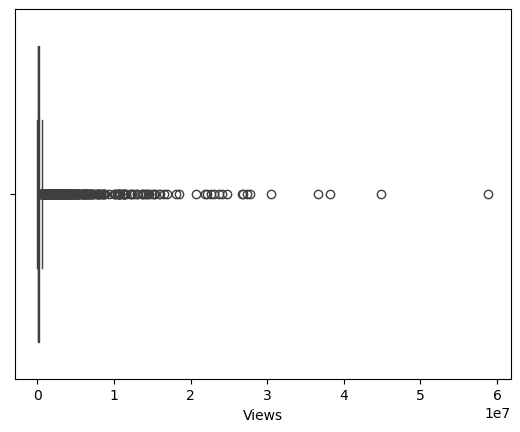

In [77]:
sns.boxplot(x=video_data['Views'])

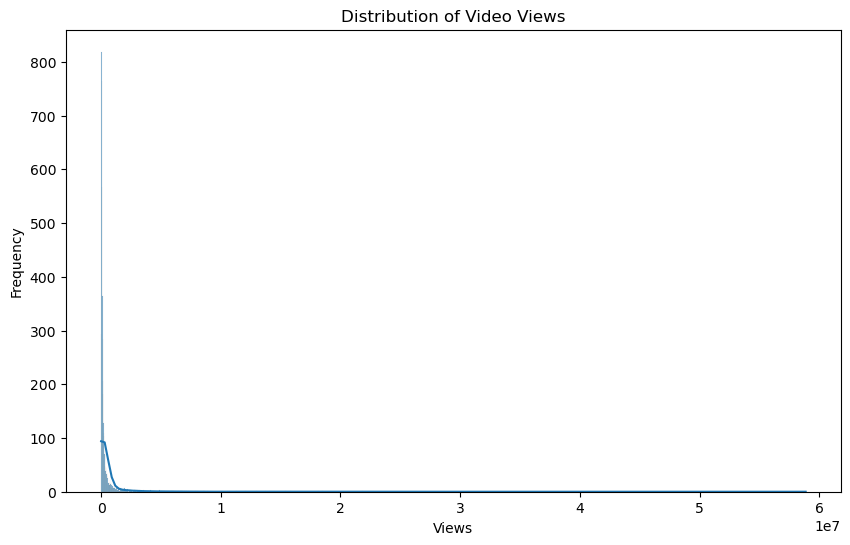

In [79]:

# Plot the distribution of views
plt.figure(figsize=(10, 6))
sns.histplot(video_data['Views'].dropna(), kde=True)
plt.title('Distribution of Video Views')
plt.xlabel('Views')
plt.ylabel('Frequency')
plt.show()

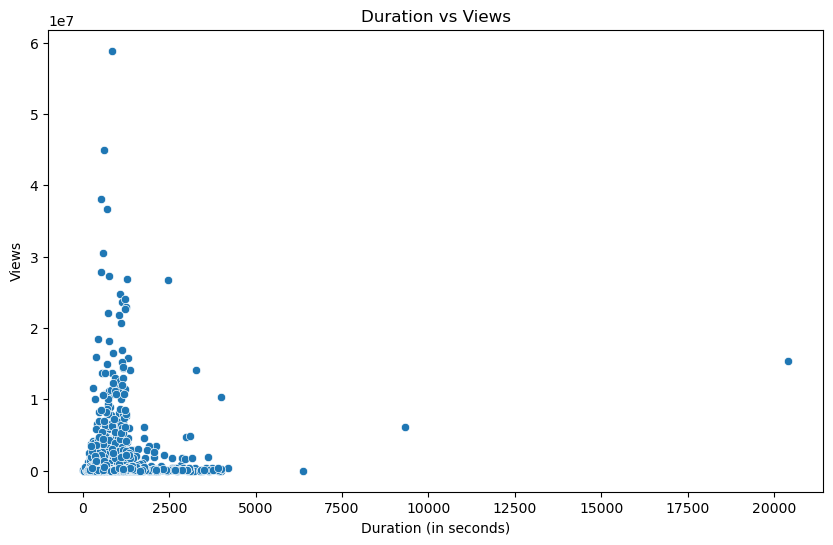

In [83]:
# Plot Duration vs Views
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration_seconds', y='Views', data=video_data_cleaned)
plt.title('Duration vs Views')
plt.xlabel('Duration (in seconds)')
plt.ylabel('Views')
plt.show()